In [3]:
import pandas as pd
url = 'NBA_players_2015.csv'
nba = pd.read_csv(url, index_col=0)

In [5]:
nba.columns

Index([u'season_end', u'player', u'pos', u'age', u'bref_team_id', u'g', u'gs',
       u'mp', u'fg', u'fga', u'fg_', u'x3p', u'x3pa', u'x3p_', u'x2p', u'x2pa',
       u'x2p_', u'ft', u'fta', u'ft_', u'orb', u'drb', u'trb', u'ast', u'stl',
       u'blk', u'tov', u'pf', u'pts', u'G', u'MP', u'PER', u'TS%', u'3PAr',
       u'FTr', u'TRB%', u'AST%', u'STL%', u'BLK%', u'TOV%', u'USG%', u'OWS',
       u'DWS', u'WS', u'WS/48', u'OBPM', u'DBPM', u'BPM', u'VORP'],
      dtype='object')

In [7]:
nba.pos.value_counts()

G    200
F    199
C     79
Name: pos, dtype: int64

In [9]:
nba['pos_num'] = nba.pos.map({'C':0, 'F':1, 'G':2})

In [11]:
feature_cols = ['ast', 'stl', 'blk', 'tov', 'pf']
X = nba[feature_cols]

In [13]:
X = nba.loc[:, 'ast':'pf']

In [15]:
y = nba.pos_num

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [24]:
player = [1, 1, 0, 1, 2]

In [29]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=50, p=2,
           weights='uniform')

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

In [33]:
nba.groupby('pos').ast.describe().unstack()

       pos
count  C       79.000000
       F      199.000000
       G      200.000000
mean   C        0.945570
       F        1.173367
       G        2.729000
std    C        0.858263
       F        1.086252
       G        2.128287
min    C        0.000000
       F        0.000000
       G        0.000000
25%    C        0.400000
       F        0.450000
       G        1.100000
50%    C        0.800000
       F        0.900000
       G        2.250000
75%    C        1.150000
       F        1.500000
       G        3.800000
max    C        4.400000
       F        7.300000
       G       10.200000
dtype: float64

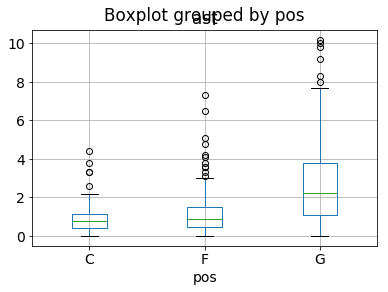

In [35]:
nba.boxplot(column='ast', by='pos')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D742DA0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000E10BC18>]], dtype=object)

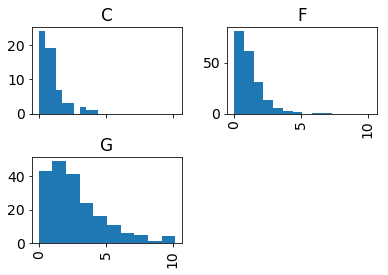

In [36]:
nba.hist(column='ast', by='pos', sharex=True)